In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Zero shot


/var/folders/9w/d70855yd4mq5f7vzg3zkf06c0000gn/T/ipykernel_13056/1711446430.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(df['Category']))


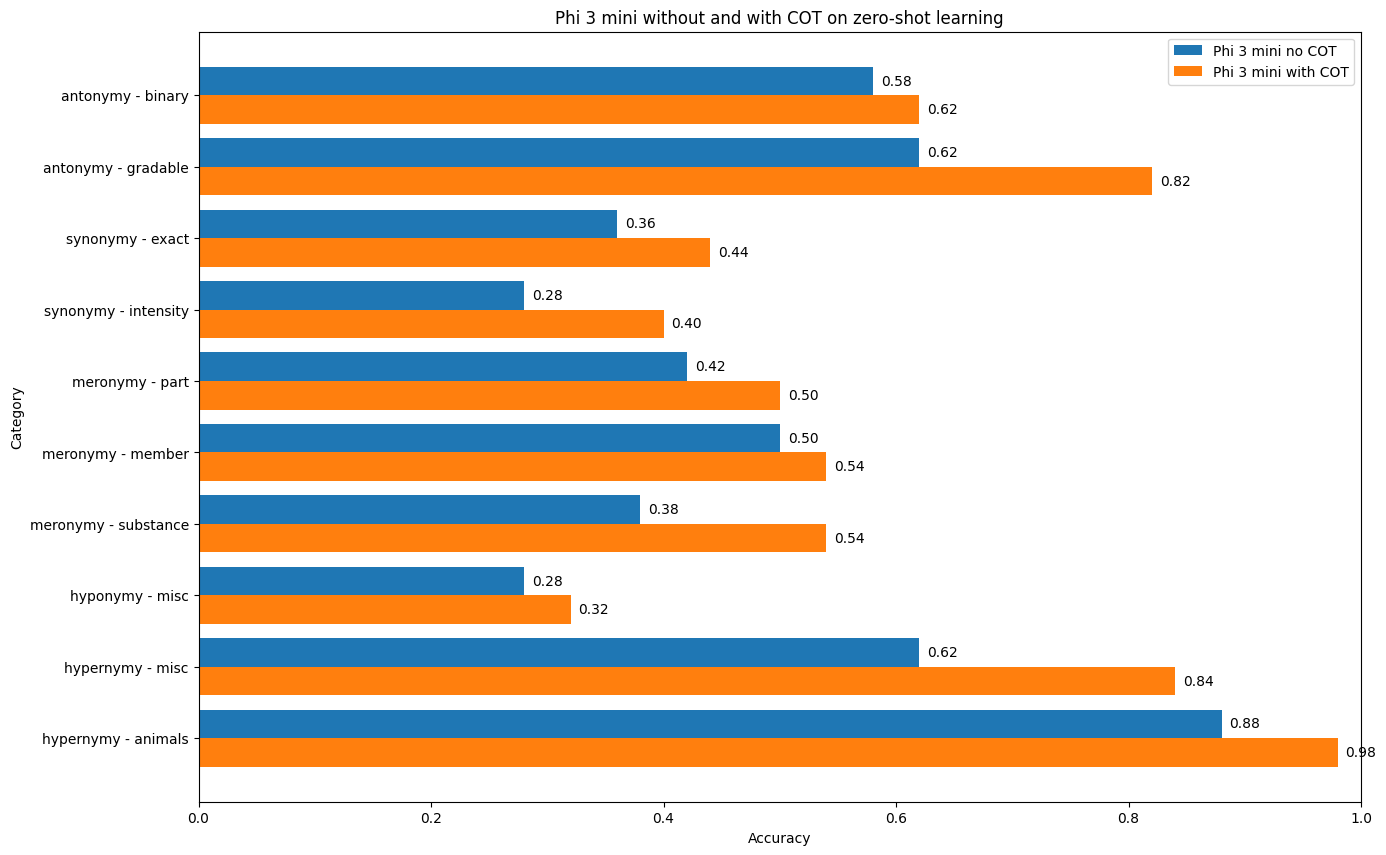

/var/folders/9w/d70855yd4mq5f7vzg3zkf06c0000gn/T/ipykernel_13056/1711446430.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(df['Category']))


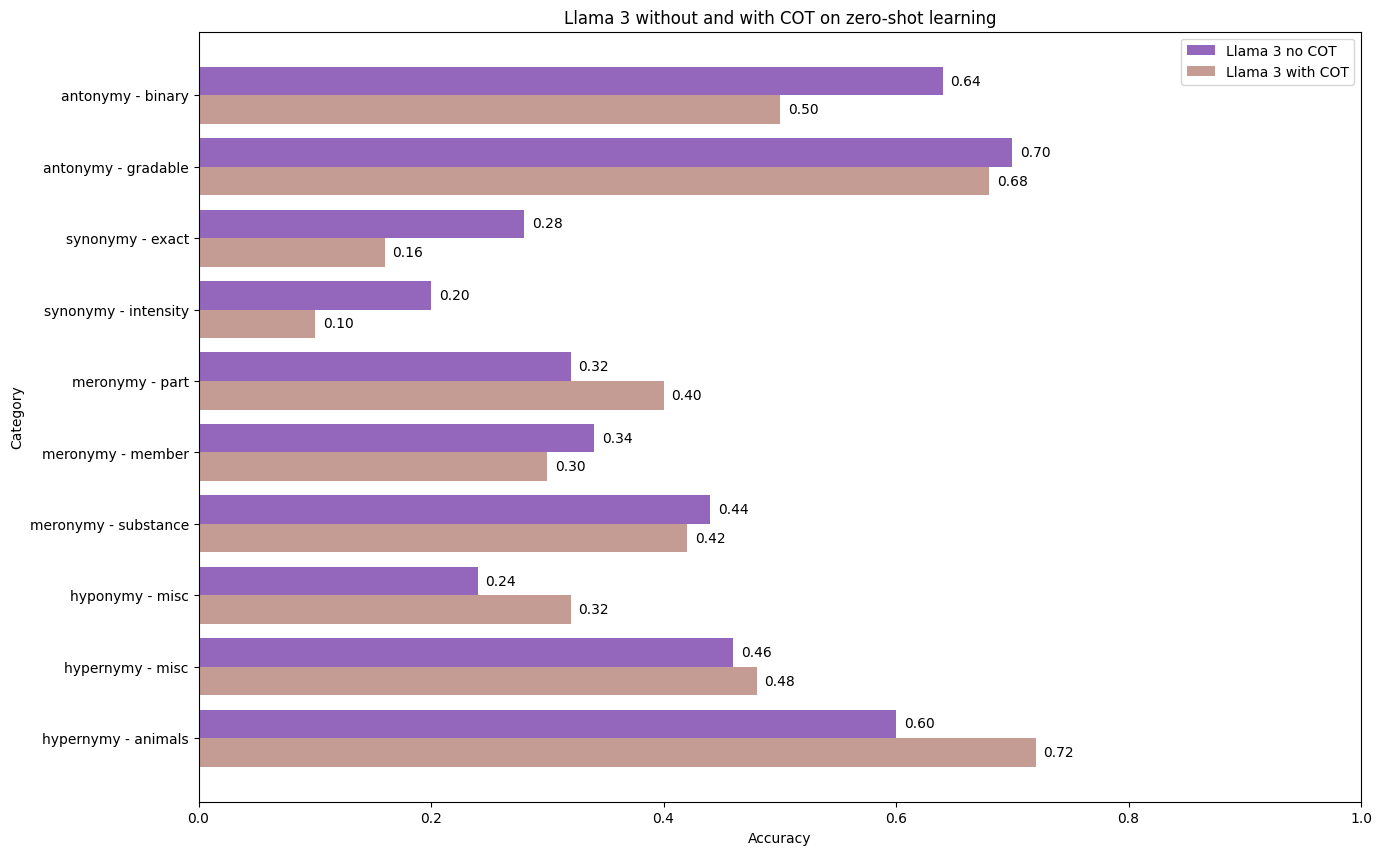

/var/folders/9w/d70855yd4mq5f7vzg3zkf06c0000gn/T/ipykernel_13056/1711446430.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(df['Category']))


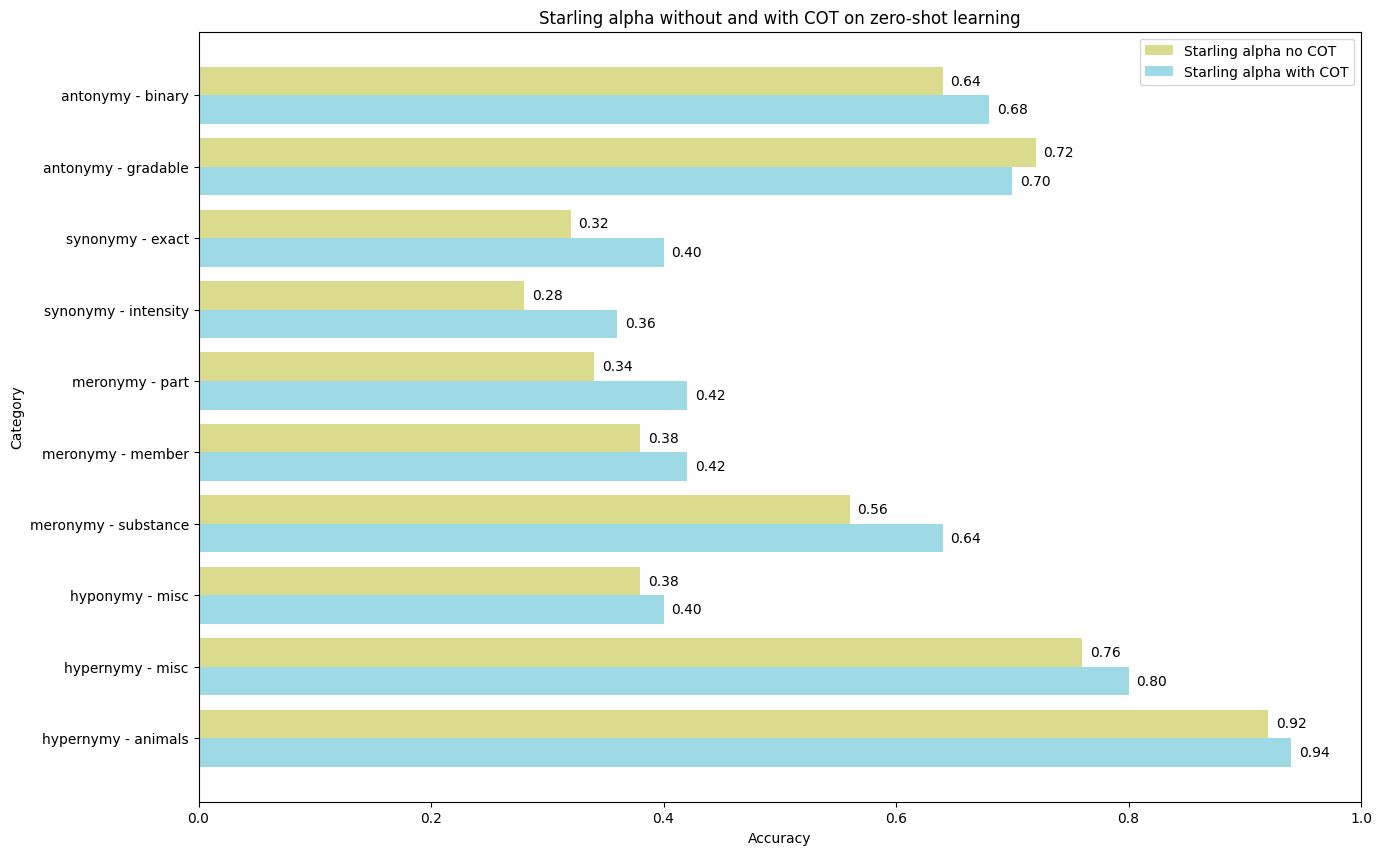

In [159]:
file_path = 'result_zeroshot.csv'
df = pd.read_csv(file_path, delimiter=';')

def zero_shot_viz(df, model):
    fig, ax = plt.subplots(figsize=(15, 10))
    colors = plt.cm.get_cmap('tab20', len(df['Category']))
    y = np.arange(len(df['Category']))
    height = 0.4
    if model == "Phi 3 mini":
        color1 = 0
        color2 = 1
    elif model == "Llama 3":
        color1 = 4
        color2 = 5
    else:
        color1 = 8
        color2 = 9
    bars1 = ax.barh(y + height/2, df[f'{model} no COT'], height, label=f'{model} no COT', color = colors(color1))
    bars2 = ax.barh(y - height/2, df[f'{model} with COT'], height, label=f'{model} with COT', color = colors(color2))
    for i in range(len(df)):
        ax.text(df[f'{model} no COT'][i] + 0.02, y[i] + height/2, f"{df[f'{model} no COT'][i]:.2f}", ha='center', va='center')
        ax.text(df[f'{model} with COT'][i] + 0.02, y[i] - height/2, f"{df[f'{model} with COT'][i]:.2f}", ha='center', va='center')
    ax.set_xlim(0, 1)
    ax.set_xlabel('Accuracy')
    ax.set_ylabel('Category')
    ax.set_yticks(y)
    ax.set_yticklabels(df['Category'])
    ax.set_title(f'{model} without and with COT on zero-shot learning')
    ax.legend()
    plt.show()
    fig.savefig(f'viz/zeroshot_{model}.pdf')

models = ["Phi 3 mini", "Llama 3", "Starling alpha"]
for model in models:
    zero_shot_viz(df, model)

## Fewshot

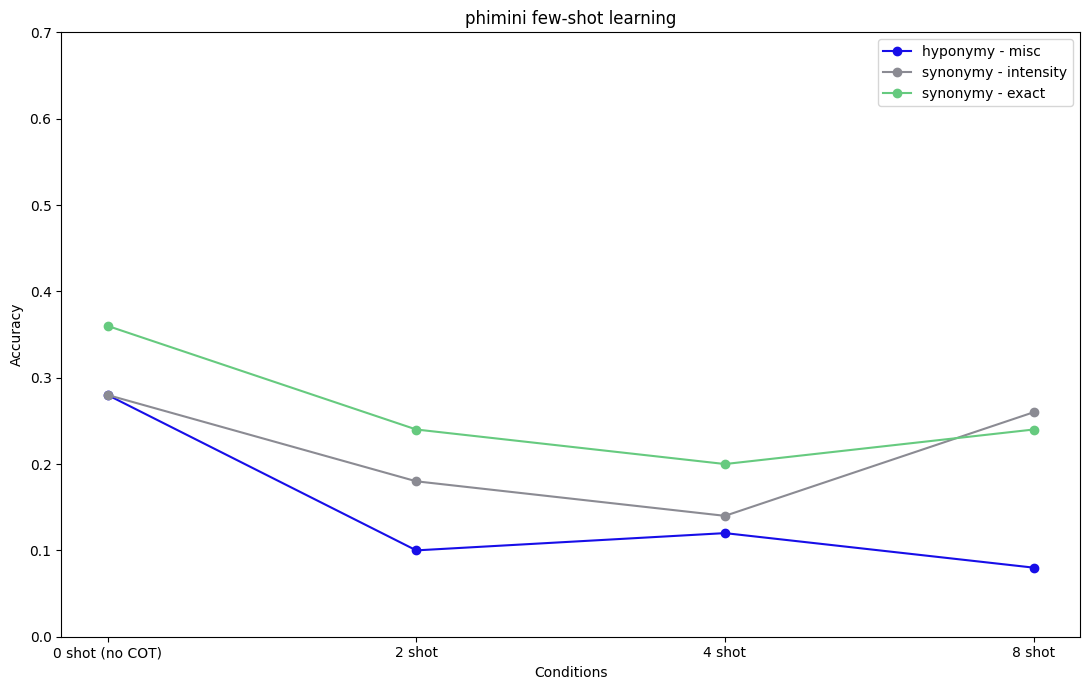

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [109]:
fig, ax = plt.subplots(figsize=(11, 7))

def fewshot_viz(model):
    file_path = f'fewshot_{model}.csv'
    df = pd.read_csv(file_path, delimiter=';')

    # Plot lines for each category
    for category in df['Category']:
        ax.plot(df.columns[1:], df[df['Category'] == category].values.flatten()[1:], marker='o', label=category, color=np.random.rand(3,))

    # Add labels and title
    ax.set_xlabel('Conditions')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'{model} few-shot learning')
    ax.legend()

    # Set x-axis limits if necessary
    ax.set_ylim(0, 0.7)

    # Show plot
    plt.tight_layout()
    plt.show()

fewshot_viz("phimini")
fewshot_viz("llama")
fewshot_viz("starling")
models = ["phimini", "llama", "starling"]
for model in models:
    fewshot_viz(model)
    #fig.savefig(f'viz/fewshot_{model}.pdf')

/var/folders/9w/d70855yd4mq5f7vzg3zkf06c0000gn/T/ipykernel_13056/3266622823.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_llama = plt.cm.get_cmap('viridis', len(df['Category']))
/var/folders/9w/d70855yd4mq5f7vzg3zkf06c0000gn/T/ipykernel_13056/3266622823.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_phimini = plt.cm.get_cmap('tab10', len(df['Category']))
/var/folders/9w/d70855yd4mq5f7vzg3zkf06c0000gn/T/ipykernel_13056/3266622823.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormap

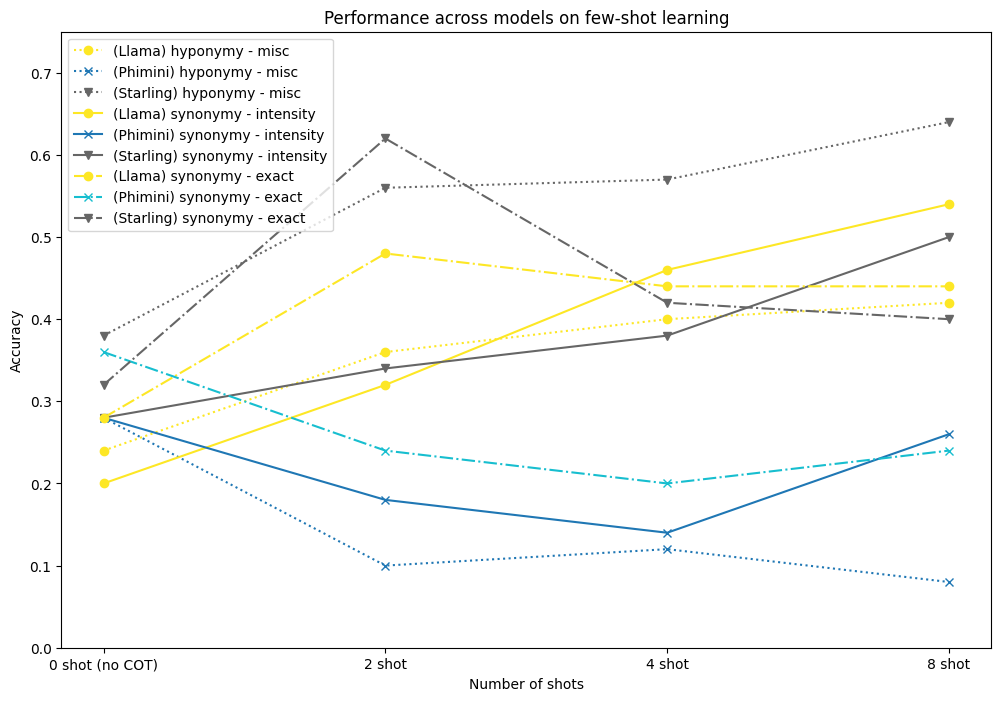

In [156]:
fig, ax = plt.subplots(figsize=(12, 8))

df_llama = pd.read_csv('fewshot_llama.csv', delimiter=';')
df_phimini = pd.read_csv('fewshot_phimini.csv', delimiter=';')
df_starling = pd.read_csv('fewshot_starling.csv', delimiter=';')

colors_llama = plt.cm.get_cmap('viridis', len(df['Category']))
colors_phimini = plt.cm.get_cmap('tab10', len(df['Category']))
colors_starling = plt.cm.get_cmap('Accent', len(df['Category']))

for category in df['Category']:
    if category == "hyponymy - misc":
        linestyle = ':'
    elif category == "synonymy - intensity":
        linestyle = '-'
    else:
        linestyle = '-.'
    ax.plot(df_llama.columns[1:], df_llama[df_llama['Category'] == category].values.flatten()[1:], marker='o', linestyle=linestyle, label="(Llama) " + category, color=colors_llama(np.random.randint(0, 10)))
    ax.plot(df_phimini.columns[1:], df_phimini[df_phimini['Category'] == category].values.flatten()[1:], marker='x', linestyle=linestyle, label="(Phimini) " + category, color=colors_phimini(np.random.randint(0, 10)))
    ax.plot(df_starling.columns[1:], df_starling[df_starling['Category'] == category].values.flatten()[1:], marker='v', linestyle=linestyle, label="(Starling) " + category, color=colors_starling(np.random.randint(0, 10)))

ax.set_xlabel('Number of shots')
ax.set_ylabel('Accuracy')
ax.set_title('Performance across models on few-shot learning')
ax.legend()
ax.set_ylim(0, 0.75)

plt.show()
fig.savefig('viz/fewshot_models.pdf')


## 1 shot